# Configuration

In [41]:
%matplotlib inline

In [42]:
import pandas as pd
import numpy as np
seed = 6302178
data_path = "/home/ml_member/syntetiq/machine_learning/Challenge_0/data.tsv"

# Reading data, small cleaning, convert types

In [43]:
df = pd.read_csv(data_path, sep="\t")
# Column names and columns have space in it
df=df.rename(columns=lambda x: x.strip())
df.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

# Converting to categorical column
numerical_columns = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cols = list(df)
categorical_columns = [col for col in cols if col not in numerical_columns]
df[categorical_columns] = df[categorical_columns].apply(lambda c: c.astype("category"))


# Exploratory Analysis

In [44]:
df.dtypes

age                  int64
workclass         category
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
label             category
dtype: object

In [45]:
df


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0


Dataset is **not balanced**, since 25% quantiles of label shows that most of the labels are 1

In [46]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [47]:
df.describe(include = ["category"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,1
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Missing values

In [48]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

### Workclass vs occupation

In [49]:
df.loc[(~df['workclass'].isnull()) & (df['occupation'].isnull())]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
5361,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,1
10845,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,1
14772,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,1
20337,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,1
23232,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,1
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,1
32314,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,1


In [50]:
df.loc[(df['workclass']=='Never-worked') & (~df['occupation'].isnull())] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


In [51]:
df.loc[(df['workclass'].isnull()) & (~df['occupation'].isnull())]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


#### Checking if the relationship between occupation and workclass is hierarchical

In [52]:
df_filled_occup = df.loc[~df['occupation'].isnull()]
df_filled_occup.groupby('occupation').workclass.nunique()

occupation
Adm-clerical         7
Armed-Forces         1
Craft-repair         7
Exec-managerial      6
Farming-fishing      7
Handlers-cleaners    7
Machine-op-inspct    7
Other-service        7
Priv-house-serv      1
Prof-specialty       6
Protective-serv      6
Sales                6
Tech-support         6
Transport-moving     7
Name: workclass, dtype: int64

## Outliers
Checking outliers on numerical columns

In [53]:
df.quantile(0.995)

age                  78.0
education-num        16.0
capital-gain      34095.0
capital-loss       2259.8
hours-per-week       84.0
Name: 0.995, dtype: float64

In [54]:
df[df['capital-gain']>30000]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
106,17,NaN,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,1
1246,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,0
1368,52,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,0
1482,53,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,0
1528,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,0
1616,46,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,0
1682,43,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,0
1765,49,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,0
1771,50,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,0
1826,22,Self-emp-not-inc,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,0


Shows that **capital-gain = 99999** is a good indicator for 0 label, so the rows won't be deleted, but instead we create a seperate column for that.

In [55]:
df[df['hours-per-week']>80]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
272,50,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,1
935,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,0
1172,25,Private,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,0
1417,31,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,Black,Male,0,0,90,United-States,0
1730,24,Private,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,1
1824,51,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,84,United-States,0
1887,55,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
2333,35,Private,11th,7,Separated,Transport-moving,Not-in-family,White,Male,0,0,90,United-States,1
2429,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,1
2761,34,NaN,11th,7,Divorced,NaN,Own-child,White,Male,0,0,84,United-States,1


Not sure what **99** and **98** hours per week could mean.

In [56]:
df[df['capital-loss']>2250]      

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
381,46,Private,5th-6th,3,Divorced,Craft-repair,Not-in-family,White,Female,0,2339,45,United-States,1
387,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,2415,6,United-States,0
732,26,Private,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,2377,45,United-States,1
786,61,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2352,50,United-States,1
873,51,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,China,0
937,41,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,40,United-States,0
972,67,Private,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Male,0,2392,40,United-States,0
1115,60,Self-emp-inc,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,0
1524,26,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,2339,55,United-States,1
1777,59,Local-gov,HS-grad,9,Widowed,Farming-fishing,Unmarried,White,Male,0,2339,40,United-States,1


## Capital-gain vs capital-loss
checking if there are observations where both capital-gain and capital-loss are >0, if not there could be only with column with positive and negative values, however I prefer keep it that way

In [57]:
df.loc[(df['capital-loss']>0) & (df['capital-gain']>0)]  

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


## Plotting columns vs label

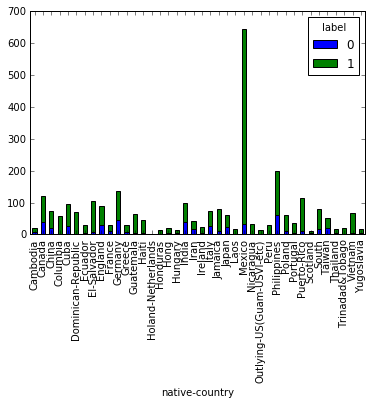

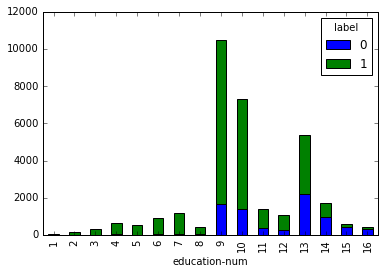

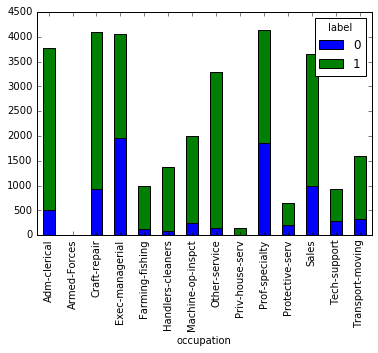

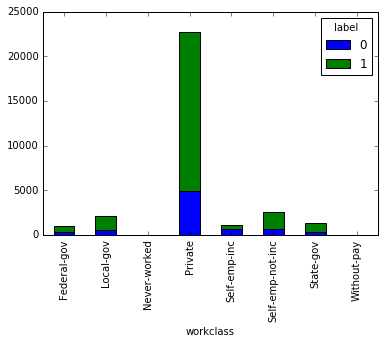

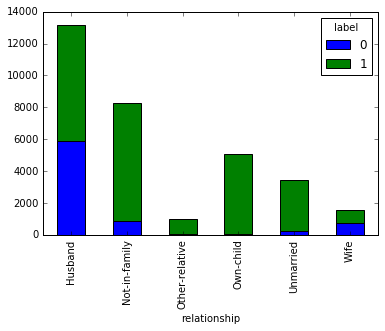

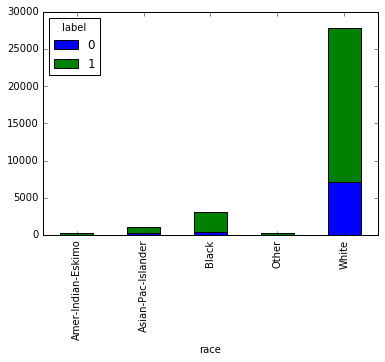

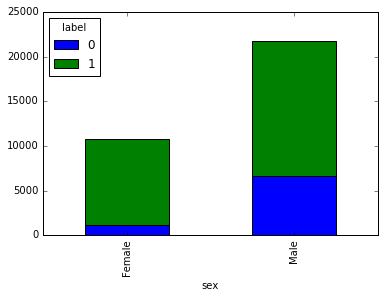

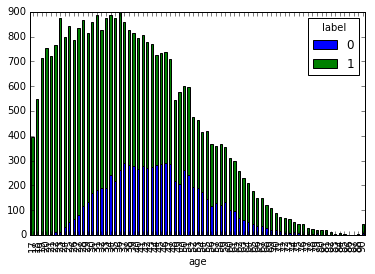

In [58]:
import matplotlib.pyplot as plt
def plot_categorical(df, col_to_check):
    width = 0.35 
    df2 = df.groupby([col_to_check, 'label'])[col_to_check].count().unstack('label').fillna(0)
    df2[[0,1]].plot(kind='bar', stacked=True)


df_contries_not_none = df.loc[(~df['native-country'].isnull()) & (df['native-country']!='United-States')]
plot_categorical(df_contries_not_none, 'native-country')
plot_categorical(df, 'education-num')
plot_categorical(df, 'occupation')
plot_categorical(df, 'workclass')
plot_categorical(df, 'relationship')
plot_categorical(df, 'race')
plot_categorical(df, 'sex')
plot_categorical(df, 'age')



- Education-num shows that probably it woule be worth creating bin like 1-8, 9-12, 13-14, 15-16. 
- 

# Data cleaning

## Impute missing values

### Imputing native-country

In [59]:
# Will impute United-States for native-country
df['native-country'].isnull().sum()


583

In [60]:
df['native-country']=df['native-country'].fillna('United-States')

In [61]:
df['native-country'].isnull().sum()

0

### Impute occupation on Never-Worked workclass

In [62]:
 # hf['occupation'].isfactor()

In [63]:
#  hf[hf['workclass']=='Never-worked', 'occupation'] = 'Never-worked'

### Impute co-missing occupation and workclass with 'Unknown'

In [64]:
df['occupation']=df['occupation'].cat.add_categories('Unknown')
df['workclass']=df['workclass'].cat.add_categories('Unknown')

In [65]:
df['occupation']=df['occupation'].fillna('Unknown')
df['workclass']=df['workclass'].fillna('Unknown')


In [66]:
df['occupation'].isnull().sum()

0

# Data tranformation /Feature engineering
Based on our preliminary exploratoty analysis the following actions are to be taken
- Remove education column since education-num describes ordinally the education column
- Create a dummy column denoting if the capital-gain is 99999
- Optional: capital column with negative loss values
- Optional: region instead of countries

In [67]:
df['capital-gain-9999'] = df['capital-gain']==99999

In [68]:
df.drop('education', axis=1, inplace=True)

In [69]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,capital-gain-9999
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,False
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1,False
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1,False
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1,False
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1,False


# Training

## Init h2o
The rest of the application will apply h2o (and not sklearn) since it is good for fast prorotyping and because of lack of time. Please be aware, that it will start a java process in the backround, so you will need Java installed.
Other advantages, we don't have to care about **one hot encoding**, it's automatic in the background like in R. As far as I know in Python categorical columns have to be manually converted to one hot encoded columns

In [70]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 58 mins
H2O cluster version:,3.16.0.2
H2O cluster version age:,1 month and 25 days
H2O cluster name:,H2O_from_python_ml_member_mpe6ng
H2O cluster total nodes:,1
H2O cluster free memory:,2.431 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [71]:
hf = h2o.H2OFrame(df)
x = hf.columns
y = "label"
x.remove(y)
hf[y] = hf[y].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [72]:
train, valid, test = hf.split_frame(ratios=[.7, .15], seed=seed)

## training on all training variales
Some extra info:
 - balance classes, since it is skewed towards 1
 - 3 fold cross validation
 - grid search on important params
 - auto categorical value transformation (one-hot encoding, ....)


In [73]:
gbm_params = {
                'learn_rate': [0.01, 0.1],
                'max_depth': [7,  9,  11],
                'nbins': [10, 15],
                'col_sample_rate': [0.7, 1.0]
              }



gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(balance_classes=True, nfolds=3),
                          grid_id='gbm_grid',
                          hyper_params=gbm_params)

gbm_grid.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=50,
                seed=seed)



gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [74]:
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf

     col_sample_rate learn_rate max_depth nbins          model_ids  \
0                1.0        0.1         7    15  gbm_grid_model_15   
1                0.7        0.1         7    15  gbm_grid_model_14   
2                0.7        0.1         7    10   gbm_grid_model_2   
3                1.0        0.1         7    10   gbm_grid_model_3   
4                0.7        0.1         9    15  gbm_grid_model_18   
5                0.7        0.1         9    10   gbm_grid_model_6   
6                1.0        0.1         9    15  gbm_grid_model_19   
7                1.0        0.1         9    10   gbm_grid_model_7   
8                0.7        0.1        11    15  gbm_grid_model_22   
9                0.7        0.1        11    10  gbm_grid_model_10   
10               1.0        0.1        11    15  gbm_grid_model_23   
11               1.0        0.1        11    10  gbm_grid_model_11   
12               0.7       0.01         9    15  gbm_grid_model_16   
13               0.7

## Checking the best model

In [75]:
best_gbm = gbm_gridperf.models[0]

In [76]:
best_gbm._model_json['output']['variable_importances']

Variable Importances: 


variable,relative_importance,scaled_importance,percentage
relationship,9752.8818359,1.0,0.3335343
capital-gain,4334.9746094,0.4444814,0.1482498
marital-status,3571.9890137,0.3662496,0.1221568
occupation,3389.3188477,0.3475197,0.1159097
education-num,2742.5241699,0.2812014,0.0937903
age,1902.1070557,0.1950303,0.0650493
hours-per-week,1133.7097168,0.1162436,0.0387712
capital-loss,1099.5319824,0.1127392,0.0376024
native-country,671.6080322,0.0688625,0.0229680
workclass,443.9505920,0.0455199,0.0151825


# Prediction on testset

In [77]:
best_gbm_perf = best_gbm.model_performance(test)

In [78]:
best_gbm_perf.auc()

0.9346669123926064

In [79]:
best_gbm_perf.accuracy()

[[0.5435007619105814, 0.8810163189423673]]

# Future work

- More exploration
  - now I only explored mostly the categorical variable and results shows capital-gain is quite important
  - facet graphs
- More feature engineering
    - Maybe some log transformation would be useful or anything else
    - Region for countries (could be external dataset), however countries don't seem to be influencal
    - bins for education-num
- More models
 - basemodel: at least random guest with the distribution of labels.
 - check if fewer variables are sufficient
 - Trying: simple logistic regression (with interaction), random forest.
 